## Pre-Fase: Comprensión de los Datos

# Módulo 3: Ejercicio de evaluación final - ELISABET AGUILÓ THIÓ

Los datos proporcionados consisten en dos datasets que, en conjunto, describen el comportamiento de los clientes dentro de un programa de lealtad de una aerolínea.

- Customer Flight Activity.csv muestra información sobre la actividad de vuelo de los clientes (número de vuelos reservados, distancia volada, puntos acumulados, acompañantes, etc.).

- Customer Loyalty History.csv contiene el perfil detallado de los clientes (ubicación, nivel educativo, ingresos, estado civil, etc.).


## 1.1. Librerías 

In [2]:
# ------------------------------
# Manipulación de datos
# ------------------------------
import pandas as pd        # pandas → trabajar con tablas (DataFrames)
import numpy as np         # numpy → operaciones numéricas y manejo de nulos (np.nan)
import os                  # os → interacción con el sistema operativo (verificar existencia de archivos)

# ------------------------------
# Visualización de datos
# ------------------------------
import matplotlib.pyplot as plt  # matplotlib → gráficos básicos
import seaborn as sns            # seaborn → gráficos estadísticos avanzados

# ------------------------------
# Configuración del entorno
# ------------------------------
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas en la salida
pd.set_option('display.max_rows', 100)      # Limitar filas mostradas a 100 (para evitar salidas excesivas)

# ------------------------------
# Configuración de visualizaciones
# ------------------------------
# Define un estilo profesional y limpio para todas las gráficas del notebook.
# "whitegrid" añade una cuadrícula de fondo que facilita la lectura de valores
# sin sobrecargar visualmente el gráfico.
sns.set_style("whitegrid")

# Establece el tamaño estándar para todas las gráficas: 10 pulgadas de ancho × 6 de alto.
# Sin esta configuración, las gráficas pueden salir muy pequeñas y difíciles de leer.
# Este tamaño es óptimo para notebooks y presentaciones.
plt.rcParams['figure.figsize'] = (10, 6)

# Define el tamaño de fuente por defecto (10 puntos) para títulos, etiquetas y leyendas.
# Garantiza legibilidad sin necesidad de ajustar manualmente en cada gráfico.
plt.rcParams['font.size'] = 10

## Fase 1: Exploración y Limpieza

## Metodología

- Antes de juntar los datos, revisamos y limpiamos cada CSV por separado.
- Cada archivo puede tener datos incompletos, errores, duplicados, inconsistencias y proceder de distintas fuentes que causen problemas al combinarlos.
- Limpiarlos individualmente garantiza que los datos sean correctos para el análisis.

## CSV A – “Customer Flight Activity.csv”

### CSV A – Fase 1: Exploración inicial

In [3]:
# Definimos la ruta donde está el archivo (carpeta "data" + nombre del archivo)
ruta = "data/Customer Flight Activity.csv"

# Verificamos si el archivo existe en esa ruta
if os.path.exists(ruta):
    # Si existe, lo leemos y lo convertimos en un DataFrame
    df_flight = pd.read_csv(ruta)
    print("✅ Archivo cargado correctamente")
else:
    # Si no existe, mostramos un mensaje de error
    print("⚠️ Archivo no encontrado")
    df_flight = None


✅ Archivo cargado correctamente


In [4]:
# 1️⃣ DIMENSIÓN DEL DATASET (NÚMERO DE FILAS Y COLUMNAS)
# Cuando usas shape, lo que estás obteniendo es una tupla con dos valores (filas, columnas): 
print(f"Filas: {df_flight.shape[0]:,} | Columnas: {df_flight.shape[1]}")
# df_flight.columns ya es suficiente para ver las columnas, pero nos muestra un Index
# si queremos una lista de las columnas, podemos convertirlo a lista con tolist()
print("Columnas:", df_flight.columns.tolist())

# Anotaciones: 
# COLUMNAS = "¿QUÉ PUEDO MEDIR?"
# 10 columnas = 10 cosas distintas (número de vuelos reservados, distancia volada, puntos acumulados, acompañantes, etc.)
# FILAS = "¿CUÁNTOS CASOS TENGO?"
# Más de 400K filas = grande (por encima de 100K) → Esto significa que hay muchos registros (muchos casos), 
# los resultados reflejaran mejor la realidad que teniendo pocos casos.


Filas: 405,624 | Columnas: 10
Columnas: ['Loyalty Number', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']


In [5]:
# 2️⃣ INFORMACIÓN GENERAL DE LOS DATOS (TIPOLOGÍA DE DATOS Y PRESENCIA DE VALORES NULOS)
df_flight.info()
# podemos profundizar más que con el shape: 
# además de ver el número de filas y columnas,
# podemos ver tipos de datos y cuántos valores nulos tiene cada columna

# Anotaciones:

# Tipología de datos:
# - El dataset tiene 405,624 registros y 10 columnas.
# - La mayoría de las columnas son numéricas enteras (int64).
# - Solo la columna 'points_accumulated' tiene decimales (float64).
# - No hay columnas categóricas (tipo object).
df_flight.dtypes.value_counts()

# - En la fase de limpieza se valorará convertir:
#   • year y month a categóricas, ya que son etiquetas/identificadores (no se operan matemáticamente).
#   • loyalty_number a string, porque tiene muchos valores únicos y no conviene tratarlo como categoría.

# Valores nulos:
# - No hay información incompleta (valores faltantes) en ninguna columna (405,624 non-null en todas).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


int64      9
float64    1
Name: count, dtype: int64

In [6]:
# 3️⃣ INSPECCIÓN DE REGISTROS (PRIMERAS, ÚLTIMAS Y FILAS ALEATORIAS)
# display() se usa para mostrar tablas de forma clara en un notebook (mejor que print)

display(df_flight.head())      
display(df_flight.tail())      
display(df_flight.sample(5, random_state=42))  # Muestra filas al azar. random_state=42 → siempre las mismas

#Anotaciones

# Observaciones generales:
# - No se observan valores negativos en head, tail ni sample.
# - A simple vista, los datos parecen completos y no se detecta información incompleta (no hay presencia de valores NAN),
# lo cual confirma la ausencia de nulos observada en info().

# Primeras filas
# - Verifica: que los datos se cargaron bien y muestra las columnas
# - Cada fila es la actividad mensual de un cliente (Year + Month).
# - Los nombres de las columnas pueden generar errores. En fase de limpieza, eliminar espacios y mayúsculas para facilitar análisis posteriores. 
# - Total Flights podría ser la suma de Flights Booked + Flights with Companions. En la fase de limpieza, comprobar:
#   Flights Booked (Vuelos sin acompañantes reservados en ese mes) 
#   + Flights with Companions (Vuelos con acompañantes reservados en ese mes) 
#   = Total de vuelos del mes reservados (sin acompañantes + con acompañantes)

# - Los ceros en la columna Points redeemed ( canjeo de puntos) pueden indicar: 
# 1. Vuela → Acumula puntos (SIEMPRE, Points accumulated)
# 2. Canjea → Gasta puntos (NO SE OBSERVA, el cliente puede no tener suficientes puntos para canjearlos o por desconocimiento).

# Últimas filas
# - Detecta: filas finales que no son datos reales (suma de totales o notas que no son registros de clientes)
# - En nuestro caso, las últimas filas muestran solo datos reales de clientes.

# Muestra aleatoria
# - Revisar filas al azar ayuda a detectar errores no visibles al inicio o final.
# - En la muestra no se observan errores evidentes.


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
182259,802535,2017,11,0,0,0,0,0.0,0,0
78391,674643,2017,5,0,0,0,0,0.0,0,0
24345,496371,2017,2,4,4,8,1512,151.0,0,0
297818,659419,2018,6,0,0,0,0,0.0,0,0
203891,158560,2018,1,3,0,3,1911,191.0,0,0


In [7]:
# 4️⃣ RESUMEN VALORES 

# 1. NUMÉRICOS 
# describe().T muestra estadísticas básicas y las filas quedan como columnas (más fácil de leer)

display(df_flight.describe().T)  

# Anotaciones

# Se determina la columna más relevante para el análisis estadístico: total flights

# 1) Integridad (count)
# - Todas las columnas tienen 405,624 registros.
# - Confirmamos que no hay valores nulos; los datos están completos.

# 2) Rangos y coherencia (min y max)
# - Años: Solo 2017 y 2018.
# - Meses: Del 1 al 12.

# 2. CATEGÓRICOS

# En la fase de exploración, se analiza lo que existe en los datos.
# info() ya me dio la información: No hay variables tipo object en este momento.
# Por tanto, NO tiene sentido hacer describe(include='object')


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [8]:
# 5️⃣ CALIDAD DE LOS DATOS (NULOS, DUPLICADOS Y VALORES ÚNICOS)
print("🔴 NULOS POR COLUMNA:", df_flight.isnull().sum()) 
print("🔴 FILAS DUPLICADAS:", df_flight.duplicated().sum()) 
print("🔴 % DUPLICADOS:", df_flight.duplicated().mean() * 100) 
print("🔴 VALORES ÚNICOS:\n", df_flight.nunique()) 

# Anotaciones 

# NULOS: 
# No hay valores nulos → Dataset completo, listo para análisis

# DUPLICADOS: 
# 1,864 filas repetidas (0.46%) → Riesgo de distorsionar los datos
# Acción en fase posterior de limpieza: Eliminar con drop_duplicates()

# VALORES ÚNICOS:
# Revela variedad real por columna
# - Loyalty Number: 16,737 clientes únicos (lógico: múltiples meses/cliente)
# - Month: 12 valores (correcto: solo 12 meses posibles)
# - Year: 2 años (correcto: 2017-2018)

🔴 NULOS POR COLUMNA: Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64
🔴 FILAS DUPLICADAS: 1864
🔴 % DUPLICADOS: 0.4595388833007909
🔴 VALORES ÚNICOS:
 Loyalty Number                 16737
Year                               2
Month                             12
Flights Booked                    22
Flights with Companions           12
Total Flights                     33
Distance                        4746
Points Accumulated              1549
Points Redeemed                  587
Dollar Cost Points Redeemed       49
dtype: int64


### CSV A – Fase 1: Limpieza

In [9]:
# 1) Renombrar columnas
df_flight.columns = df_flight.columns.str.lower().str.replace(' ', '_')
print("Columnas en snake_case (minúsculas y separadas por _):", df_flight.columns.tolist())

# 2) Cambio de tipos ( columnas: loyalty_number, year y month)
df_flight['loyalty_number'] = df_flight['loyalty_number'].astype('string')
df_flight['year'] = df_flight['year'].astype('category')
df_flight['month'] = df_flight['month'].astype('category')
print("Tipo de variables:")
print(df_flight[['loyalty_number', 'year', 'month']].dtypes)

# 3) Validar columnas sumatorias (total_flights)
print("¿La columna total_flights es el total de vuelos del mes reservados (reservados sin acompañantes + reservados con acompañantes)?", 
      (df_flight['total_flights'] == df_flight['flights_booked'] + df_flight['flights_with_companions']).all())

# 4) Eliminar duplicados
df_flight = df_flight.drop_duplicates()
print("El número de duplicados después de la limpieza:", df_flight.duplicated().sum())

print("\n✅ Limpieza de Customer Flight Activity completada")


Columnas en snake_case (minúsculas y separadas por _): ['loyalty_number', 'year', 'month', 'flights_booked', 'flights_with_companions', 'total_flights', 'distance', 'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed']
Tipo de variables:
loyalty_number    string[python]
year                    category
month                   category
dtype: object
¿La columna total_flights es el total de vuelos del mes reservados (reservados sin acompañantes + reservados con acompañantes)? True
El número de duplicados después de la limpieza: 0

✅ Limpieza de Customer Flight Activity completada


## CSV B– “Customer Loyalty History”

### CSV B – Fase 1: Exploración inicial

In [10]:
# Definimos la ruta donde está el archivo (carpeta "data" + nombre correcto del archivo)
ruta = "data/Customer Loyalty History.csv"

# Verificamos si el archivo existe en esa ruta
if os.path.exists(ruta):
    # Si existe, lo leemos y lo convertimos en un DataFrame
    df_loyalty= pd.read_csv(ruta)
    print("✅ Archivo cargado correctamente")
else:
    # Si no existe, mostramos un mensaje de error
    print("⚠️ Archivo no encontrado en la ruta:", ruta)
    df_loyalty = None

✅ Archivo cargado correctamente


In [11]:
# 1️⃣ DIMENSIÓN DEL DATASET (NÚMERO DE FILAS Y COLUMNAS)
# Cuando usas shape, lo que estás obteniendo es una tupla con dos valores (filas, columnas): 
print(f"Filas: {df_loyalty.shape[0]:,} | Columnas: {df_loyalty.shape[1]}")
# df_loyalty.columns ya es suficiente para ver las columnas, pero nos muestra un Index
# si queremos una lista de las columnas, podemos convertirlo a lista con tolist()
print("Columnas:", df_loyalty.columns.tolist())

# Anotaciones: 
# COLUMNAS = "¿QUÉ PUEDO MEDIR?"
# 16 columnas = 16 cosas distintas (ubicación, nivel educativo, ingresos, estado civil, etc.).
# Columna común con Flight Activity.csv (clave): Loyalty Number
# FILAS = "¿CUÁNTOS CASOS TENGO?" 
# 16,737 filas 


Filas: 16,737 | Columnas: 16
Columnas: ['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month']


In [12]:
# 2️⃣ INFORMACIÓN GENERAL DE LOS DATOS (TIPOLOGÍA DE DATOS Y PRESENCIA DE VALORES NULOS)
df_loyalty.info()
# podemos profundizar más que con el shape: 
# además de ver el número de filas y columnas,
# podemos ver tipos de datos y cuántos valores nulos tiene cada columna

# Anotaciones:

# Tipología de datos: 
# El dataset contiene 16.737 registros (filas) y 16 variables (columnas).
#  Se identifican tres tipos de datos:
#   • Variables categóricas: 9 columnas (Country, Province, City, Gender, Education, etc.).
#   • Variables numéricas enteras: 3 columnas (Loyalty Number, Enrollment Year, Enrollment Month).
#   • Variables numéricas con decimales: 4 columnas (Salary, CLV, Cancellation Year, Cancellation Month).
df_loyalty.dtypes.value_counts()

# - En la fase de limpieza se evaluará convertir:
#   • loyalty_number a string, ya que es un identificador único de cliente
#     (no tiene sentido tratarlo como variable numérica ni como categoría).
#     Además, esto facilita la unión (merge) con otros dataframes.
#
#   • Enrollment Year, Enrollment Month, Cancellation Year y Cancellation Month a variables categóricas,
#     porque representan etiquetas temporales (años/meses) y se utilizan únicamente para agrupar o segmentar,
#     no para realizar operaciones matemáticas.

# - Valores nulos detectados:
#   • Salary: 4.238 valores nulos, indicando información salarial incompleta,
#      lo cual puede ser coherente si el cliente no quiere dar este tipo de información.
#   • Cancellation Year y Cancellation Month: solo 2.067 valores no nulos,
#     solo una parte de clientes ha cancelado la membresía.
#   • El resto de las columnas no presenta valores faltantes.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

object     9
float64    4
int64      3
Name: count, dtype: int64

In [13]:
# 3️⃣ INSPECCIÓN DE REGISTROS (PRIMERAS, ÚLTIMAS Y FILAS ALEATORIAS)
# display() se usa para mostrar tablas de forma clara en un notebook (mejor que print)

display(df_loyalty.head())      
display(df_loyalty.tail())      
display(df_loyalty.sample(5, random_state=42))  # Muestra filas al azar. random_state=42 → siempre las mismas

# Anotaciones

# Observaciones generales:
# - Se observan valores negativos en Salary en tail.
# - A simple vista aparecen valores faltantes (NaN) en diferentes filas (primeras filas, últimas filas y en muestra aleatoria del medio).

# Primeras filas:
# - Verifica que los datos se cargaron correctamente y muestra las columnas.
# - Cada fila representa el perfil de un cliente (ubicación, nivel educativo, ingresos, estado civil, etc.).
# - Los nombres de las columnas contienen espacios y mayúsculas; en limpieza se deben normalizar a snake_case.

# Últimas filas:
# - Se revisa si existen filas que no correspondan a registros reales (por ejemplo, totales o notas).
# - En este caso, las últimas filas corresponden a datos de clientes.
# - Se detecta un salario negativo (-57297.0), lo cual requiere revisión.

# Muestra aleatoria:
# - Permite detectar errores que no aparecen al inicio o al final.
# - En la muestra seleccionada no se observan errores evidentes.

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
9770,232533,Canada,British Columbia,Whistler,V6T 1Y8,Female,College,NaN,Married,Nova,36695.91,Standard,2018,8,NaN,NaN
6002,381065,Canada,Manitoba,Winnipeg,R2C 0M5,Male,Bachelor,87635.0,Married,Nova,4669.23,Standard,2015,8,2017.0,3.0
12985,974500,Canada,Nova Scotia,Halifax,B3J 9S2,Male,College,NaN,Married,Star,4715.47,Standard,2016,4,NaN,NaN
99,695855,Canada,Quebec,Montreal,H2T 2J6,Female,College,NaN,Divorced,Star,4019.38,Standard,2013,4,NaN,NaN
8641,934604,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,59169.0,Married,Nova,9816.53,Standard,2014,3,NaN,NaN


In [14]:
# 4️⃣ RESUMEN VALORES:

# 1. NUMÉRICOS 

# describe().T muestra estadísticas básicas y las filas quedan como columnas (más fácil de leer)

display(df_loyalty.describe().T)  

# Anotaciones:

# Se determinan las columnas más relevantes para el análisis estadístico:
# - CLV: Valor total que aporta un cliente → nos interesa saber quién invierte más en el negocio.
# - Salary: Poder adquisitivo → capacidad de gasto.

# 1) Integridad (count)
# - CLV: el count representa el número total de filas y que está completa la información de esta columna.
# - Salary: que el count sea menor que el número total de filas confirma que hay valores nulos y que no está completa la información de esta columna.

# 2) Rangos y coherencia (min y max)

# - CLV:
#   - min = 1898.01
#   - max = 83325.38
# Ambos valores son coherentes y positivos. No hay errores evidentes.
# El mínimo (1898.01) representa clientes de bajo valor, mientras que el máximo (83325.38) 
# indica la existencia de clientes VIP o de muy alto valor.
# Rango muy amplio (81427.37 puntos de diferencia) sugiere alta heterogeneidad en el valor de los clientes.


# - Salary:
# - No hay coherencia en el mínimo en salario: -58486.00. 	
# - Puede ser un error de signo (¿debería ser positivo?)
# - Si los percentiles (Q1, Q2, Q3) son todos positivos y razonables, es asumible pensar que el valor negativo es un error y debe corregirse (cambiando signo)
#   Es coherente: min 58486.00, Q1 59246.50, Q2 73455.00, Q3 88517.50 
# Una vez cambiado el signo, min=58.486,00 € y max=407.228,00 € representan los extremos realistas (clientes de ingresos bajos y altos).


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [15]:
# 2. CATEGÓRICOS

# Para variables categóricas usamos include='object' o include='category'
display(df_loyalty.describe(include='object').T)

# Anotaciones:

# El método describe() con include='object' muestra estadísticas específicas para variables categóricas:
# - count: Número total de valores no nulos
# - unique: Número de categorías diferentes
# - top: La categoría más frecuente (moda)
# - freq: Frecuencia de la categoría más común

# INTERPRETACIÓN GENERAL:

# - count: coincide con el total de observaciones, por lo que no se detectan valores nulos.

# INTERPRETACIÓN POR VARIABLE:

# 1) COUNTRY (País):
# - unique = 1 → Solo hay un país (Canada)
# - top = Canada → Todos los clientes son de Canadá
# - freq = 16,737 → Confirma que el 100% son de Canada
print(df_loyalty['Country'].unique())

# 2) PROVINCE (Provincia):
# - unique = 11 → Hay 11 provincias diferentes
# - top = Ontario → La provincia más común
# - freq = 5404 → Número de clientes en Ontario
print(df_loyalty['Province'].unique())

# 3) CITY (Ciudad):
# - unique = 29 → 29 ciudades diferentes
# - top = Toronto → La ciudad con más clientes
# - freq = 3351 → Número de clientes en Toronto
print(df_loyalty['City'].unique())

# 4) GENDER (Género):
# - unique = 2 → Male y Female
# - top = Female → El género más frecuente
# - freq = 8410 → Número de clientas
print(df_loyalty['Gender'].unique())

# 5) EDUCATION (Nivel educativo):
# - unique = 5 → 5 niveles educativos diferentes
# - top = Bachelor → El nivel más común
# - freq = 10475 → Número de clientes Bachelor
print(df_loyalty['Education'].unique())

# 6) MARITAL STATUS (Estado civil):
# - unique = 3 → Single, Married, Divorced
# - top = Married → El estado civil más frecuente
# - freq = → 9735 →  Número de clientes casados
print(df_loyalty['Marital Status'].unique())

# 7) LOYALTY CARD (Tipo de tarjeta):
# - unique = 3 → 3 tipos de tarjeta
# - top = Star → La tarjeta más común
# - freq = 7637 → Clientes con tarjeta Star
print(df_loyalty['Loyalty Card'].unique())

# 8) ENROLLMENT TYPE (Tipo de inscripción):
# - unique = 2 → Standard y 2018 Promotion
# - top = Standard → La mayoría usa inscripción estándar
# - freq = 15766 → clientes con Standard
print(df_loyalty['Enrollment Type'].unique())


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


['Canada']
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']
['Female' 'Male']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['Married' 'Divorced' 'Single']
['Star' 'Aurora' 'Nova']
['Standard' '2018 Promotion']


In [16]:
# 5️⃣ CALIDAD DE LOS DATOS (NULOS, DUPLICADOS Y VALORES ÚNICOS)
print("🔴 NULOS POR COLUMNA:", df_loyalty.isnull().sum()) 
print("🔴 FILAS DUPLICADAS:", df_loyalty.duplicated().sum()) 
print("🔴 % DUPLICADOS:", df_loyalty.duplicated().mean() * 100) 
print("🔴 VALORES ÚNICOS:\n", df_loyalty.nunique()) 

# Anotaciones 

# NULOS: 
# Hay valores nulos en Salary, Cancellation Year y Cancellation Month.

# DUPLICADOS: 
# No hay filas duplicadas. El dataset está limpio en este aspecto.

# VALORES ÚNICOS:
# Revela variedad real por columna
# - Loyalty Number: 16,737 clientes únicos (lógico: coherente con las entradas)
# - Month: 12 valores (correcto: solo 12 meses posibles)
# - Cancellation Year (6, puede ser que existan registros de cancelación en varios años).

🔴 NULOS POR COLUMNA: Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64
🔴 FILAS DUPLICADAS: 0
🔴 % DUPLICADOS: 0.0
🔴 VALORES ÚNICOS:
 Loyalty Number        16737
Country                   1
Province                 11
City                     29
Postal Code              55
Gender                    2
Education                 5
Salary                 5890
Marital Status            3
Loyalty Card              3
CLV                    7984
Enrollment Type           2
Enrollment Year           7
Enrollment Month         12
Cancellation Year         6
Cancellation Month       12
dtype: in

### CSV B – Fase 1: Limpieza

In [17]:
# 1) Renombrar columnas
df_loyalty.columns = df_loyalty.columns.str.lower().str.replace(' ', '_')
print("Columnas en snake_case (minúsculas y separadas por _):", df_loyalty.columns.tolist())

# 2) Cambio de tipos (columnas: loyalty_number, enrollment_year, enrollment_month, cancellation_year, cancellation_month)
df_loyalty['loyalty_number'] = df_loyalty['loyalty_number'].astype('string')
df_loyalty['enrollment_year'] = df_loyalty['enrollment_year'].astype('category')
df_loyalty['enrollment_month'] = df_loyalty['enrollment_month'].astype('category')
df_loyalty['cancellation_year'] = df_loyalty['cancellation_year'].astype('category')
df_loyalty['cancellation_month'] = df_loyalty['cancellation_month'].astype('category')
print("Tipo de variables:")
print(df_loyalty[['loyalty_number', 'enrollment_year', 'enrollment_month', 'cancellation_year', 'cancellation_month']].dtypes)

# 3) Corrección de salarios negativos
# Durante la exploración detectamos un salario negativo → se corrige cambiando el signo.

# Contamos cuántos salarios negativos hay
salarios_negativos = (df_loyalty['salary'] < 0).sum()
print(f"\n🔍 Salarios negativos detectados: {salarios_negativos}")

# Mostramos los registros con salarios negativos (para verificar antes de corregir)
if salarios_negativos > 0:
    print("\n📋 Registros con salarios negativos:")
    print(df_loyalty[df_loyalty['salary'] < 0])
    
    # Corregimos convirtiendo los valores negativos en positivos (cambiamos el signo)
    df_loyalty['salary'] = df_loyalty['salary'].abs()
    
    print("\n✅ Salarios negativos corregidos (convertidos a valores absolutos)")
    
    # Verificamos que ya no hay salarios negativos
    print(f"🔍 Salarios negativos tras corrección: {(df_loyalty['salary'] < 0).sum()}")

# 4) Gestión de valores nulos
# Se decide mantener los valores nulos sin imputación porque son informativos:
# - Salary: los nulos representan clientes que no quisieron declarar su salario.
#   Imputar con media/mediana introduciría información falsa y sesgaría el análisis.
# - Cancellation Year / Cancellation Month: los nulos indican clientes que NO cancelaron su membresía.
#   Son clientes ACTIVOS, por lo que el nulo tiene significado y NO debe rellenarse.
# 
# ⚠️ IMPORTANTE: Mantener estos nulos.

print("\n📊 Resumen final de valores nulos:")
print(df_loyalty.isnull().sum())

print("\n✅ Limpieza de Customer Loyalty History completada")

Columnas en snake_case (minúsculas y separadas por _): ['loyalty_number', 'country', 'province', 'city', 'postal_code', 'gender', 'education', 'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month', 'cancellation_year', 'cancellation_month']
Tipo de variables:
loyalty_number        string[python]
enrollment_year             category
enrollment_month            category
cancellation_year           category
cancellation_month          category
dtype: object

🔍 Salarios negativos detectados: 20

📋 Registros con salarios negativos:
      loyalty_number country          province            city postal_code  \
1082          542976  Canada            Quebec        Montreal     H2Y 4R4   
1894          959977  Canada  British Columbia       Vancouver     V5R 1W3   
2471          232755  Canada  British Columbia       Vancouver     V1E 4R6   
3575          525245  Canada  British Columbia        Victoria     V10 6T5   
3932          603070  C

### 🔗 MERGE (UNIÓN) DE LOS CSV

In [18]:
# 1️⃣ INFORMACIÓN ANTES DEL MERGE

print(f"\n🔹 Customer Flight Activity:")
print(f"   - Filas: {df_flight.shape[0]:,}")
print(f"   - Columnas: {df_flight.shape[1]}")
print(f"   - Clientes únicos: {df_flight['loyalty_number'].nunique():,}")

print(f"\n🔹 Customer Loyalty History:")
print(f"   - Filas: {df_loyalty.shape[0]:,}")
print(f"   - Columnas: {df_loyalty.shape[1]}")
print(f"   - Clientes únicos: {df_loyalty['loyalty_number'].nunique():,}")

# Anotaciones:
# Comparación de datasets:
# - Customer Flight Activity: 403,760 filas → actividad mensual de cada cliente (varios meses por cliente)
# - Customer Loyalty History: 16,737 filas → perfil único por cliente (una fila por cliente)
# - Columnas: 10 (flight) vs 16 (loyalty) → datasets complementarios
# - Columna común (clave): loyalty_number → permite unir ambos datasets
# 
# ¿Por qué la diferencia en filas?
# - Cada cliente en df_loyalty (16,737) puede tener MÚLTIPLES registros en df_flight
# - Ejemplo: Cliente 100018 puede tener 24 filas en df_flight (12 meses × 2 años)
#            pero solo 1 fila en df_loyalty (su perfil único)


🔹 Customer Flight Activity:
   - Filas: 403,760
   - Columnas: 10
   - Clientes únicos: 16,737

🔹 Customer Loyalty History:
   - Filas: 16,737
   - Columnas: 16
   - Clientes únicos: 16,737


In [19]:
# 2️⃣ VERIFICACIÓN DE LA COLUMNA CLAVE (loyalty_number)

print("\n🔍 VERIFICACIÓN DE TIPOS DE DATOS EN LA COLUMNA CLAVE:")
print(f"   - df_flight['loyalty_number']: {df_flight['loyalty_number'].dtype}")
print(f"   - df_loyalty['loyalty_number']: {df_loyalty['loyalty_number'].dtype}")

# Anotaciones:
# Ambas columnas deben ser del mismo tipo (string) para evitar problemas en el merge.
# Ya las convertimos a 'string' en la fase de limpieza, por lo que el merge funcionará correctamente.
# Si fueran de tipos diferentes (ej: int64 vs string), pandas podría no encontrar coincidencias.



🔍 VERIFICACIÓN DE TIPOS DE DATOS EN LA COLUMNA CLAVE:
   - df_flight['loyalty_number']: string
   - df_loyalty['loyalty_number']: string


In [20]:
# 3️⃣ DECISIÓN DEL TIPO DE MERGE

# Tipos de merge:
# 
# INNER:
#   → Solo clientes presentes en ambos datasets:
#     se pierden clientes con vuelos que aún no tienen perfil.
# 
# LEFT (mantener izquierda):
#   → Mantiene todos los vuelos y añade perfil cuando existe:
#     mejor opción para nuestro objetivo.
# 
# RIGHT (mantener derecha):
#   → Mantiene todos los perfiles de los clientes, 
#     pero puede perder actividad de vuelos.
# 
# OUTER (unión completa):
#   → Incluye toda la información, pero no toda es relevante para el análisis y puede generar ruido.

# ¿Cuál elegir para el análisis?
# - OBJETIVO: Analizar la ACTIVIDAD DE VUELO enriquecida con el PERFIL del cliente
# - DECISIÓN: LEFT JOIN usando df_flight como base
#   ✓ Mantenemos TODOS los registros de actividad de vuelo
#   ✓ Añadimos perfil del cliente cuando existe en df_loyalty
#   ✓ No perdemos información de vuelos
#   ✓ No nos interesa el perfil del cliente si no tiene actividad de vuelo.

print("\n🎯 TIPO DE MERGE SELECCIONADO: LEFT JOIN")
print("   - Base: df_flight (actividad de vuelos)")
print("   - Se añade: df_loyalty (perfil del cliente)")
print("   - Columna clave: 'loyalty_number'")


🎯 TIPO DE MERGE SELECCIONADO: LEFT JOIN
   - Base: df_flight (actividad de vuelos)
   - Se añade: df_loyalty (perfil del cliente)
   - Columna clave: 'loyalty_number'


In [21]:
# 4️⃣ EJECUCIÓN DEL MERGE

df_merged = df_flight.merge(
    df_loyalty,              # Dataset a fusionar (derecha)
    on='loyalty_number',     # Columna común para unir
    how='left',              # Tipo de merge: mantener todas las filas de df_flight
    validate='m:1'           # Validación: muchos registros de flight → 1 registro de loyalty
)

# Anotaciones relación ='m:1':
# - 'm:1' = many-to-one (muchos a uno)
# - df_flight: muchos registros por cliente
# - df_loyalty: un solo registro por cliente

print("\n✅ Merge ejecutado correctamente")


✅ Merge ejecutado correctamente


In [22]:
# 5️⃣ VERIFICACIÓN DE LA CALIDAD DEL MERGE

print("\n📊 INFORMACIÓN DESPUÉS DEL MERGE:")
print(f"   - Filas en df_merged: {df_merged.shape[0]:,}")
print(f"   - Columnas en df_merged: {df_merged.shape[1]}")
print(f"   - Clientes únicos: {df_merged['loyalty_number'].nunique():,}")

# Comparación Customer Flight Activity.csv vs Customer Loyalty History.csv: 
# 10 columnas + 16 columnas: 25 (restas 1 porque loyalty_number aparece en ambas tablas)
# Se mantienen las 405,624 filas de Customer Flight Activity ( no se pierden los vuelos)
# Todos los registros de Customer Loyalty History son perfiles de clientes únicos.

# Comprobamos si hay nulos tras el merge
print("\n🔴 NULOS TRAS EL MERGE:")
df_merged.isnull().sum().sort_values(ascending=False).head(10)
# han aumentado los nulos porque si un cliente tiene Salary = NaN, 
# Ese NaN se replica en todas sus filas de vuelos

?? cancellation_month         354110
    cancellation_year          354110



IndentationError: unexpected indent (188750062.py, line 20)

## Fase 2: Análisis Estadístico

## Metodología

Variables numéricas: 
- Medidas de tendencia central (media y mediana)
- Medidas de dispersión (desviación estándar, percentiles, coeficiente de variación)
- Detección de valores atípicos (outliers)
- Análisis de correlaciones

Variables categóricas:
- Distribución de frecuencias (absolutas y relativas)
- Proporciones y categorías dominantes



In [ ]:
# Estadística descriptiva numérica

display(df_flight.describe().T)  

# =========================================================
# 1) TOTAL FLIGHTS
# =========================================================

# --- Mediana vs Media (50%) ---
# Media: 5.1
# Mediana: 1.0
#
# Interpretación:
# - El valor típico es la mediana (1 vuelo/mes).
# - La media es mucho mayor que la mediana → asimetría positiva.
# - Existen outliers (viajeros frecuentes) que elevan la media.
# - Aunque el 50% vuela 1 vez o menos, algunos clientes llegan hasta 32 vuelos.

# --- Percentiles (25%, 50%, 75%) ---
# Q1 (25%) = 0
# Q2 (50%, mediana) = 1
# Q3 (75%) = 10
#
# Interpretación:
# - El 75% de los clientes tiene 10 vuelos o menos.
# - Solo el 25% supera los 10 vuelos.
# - Gran diferencia entre Q2 y Q3 → distribución muy asimétrica:
#   la mayoría vuela poco, pero un grupo reducido vuela mucho.

# --- Desviación estándar y Coeficiente de Variación ---
# Desviación estándar = 6.5
# CV = std / media = 6.5 / 5.1 = 1.25
#
# Conclusión:
# - CV > 1 → alta dispersión.
# - Alta variabilidad explicada por valores extremos (outliers).

# =========================================================
# 2) CLV (Customer Lifetime Value)
# =========================================================

# --- Mediana vs Media (50%) ---
# Media: 7,988.90
# Mediana: 5,780.18
#
# Interpretación:
# - El valor típico del cliente es la mediana: 5,780.18.
# - Diferencia absoluta: 2,208.72

# Diferencia porcentual:
# (Media - Mediana) / Mediana * 100
# = (7,988.90 - 5,780.18) / 5,780.18 * 100
# = 38.2%
#
# Conclusión:
# - Asimetría positiva considerable.
# - Existen clientes de muy alto valor (máx: 83,325.38)
#   que elevan significativamente la media.
# - El cliente típico aporta bastante menos que la media.

# --- Percentiles (25%, 50%, 75%) ---
# Q1 (25%) = 3,980.84
# Q2 (50%, mediana) = 5,780.18
# Q3 (75%) = 8,940.58
#
# Interpretación:
# - El 75% de los clientes tiene un CLV ≤ 8,940.58.
# - Solo el 25% supera este valor.
# - Existe un segmento minoritario pero muy valioso de clientes (VIP).

# --- Desviación estándar y Coeficiente de Variación ---
# Desviación estándar = 6,860.98
# CV = std / media = 6,860.98 / 7,988.90 = 0.86
#
# Conclusión:
# - CV cercano a 1 → variabilidad considerable.
# - Población heterogénea en valor aportado.
# - Coherente con la existencia de clientes de alto CLV.

# =========================================================
# 3) SALARY
# =========================================================

# --- Mediana vs Media (50%) ---
# Media: 79,245.61
# Mediana: 73,455.00
#
# Interpretación:
# - El salario típico es la mediana: 73,455.00.
# - Diferencia absoluta: 5,790.61

# Diferencia porcentual:
# (79,245.61 - 73,455.00) / 73,455.00 * 100 = 7.88%
#
# Conclusión:
# - Asimetría positiva leve.
# - Distribución mayormente simétrica con algunos salarios altos
#   que elevan la media (máx: 407,228).

# --- Percentiles (25%, 50%, 75%) ---
# Q1 (25%) = 59,246.50
# Q2 (50%, mediana) = 73,455.00
# Q3 (75%) = 88,517.50
#
# Interpretación:
# - El 75% de los clientes gana ≤ 88,517.50.
# - Solo el 25% supera este valor.

# --- Desviación estándar y Coeficiente de Variación ---
# Desviación estándar = 35,008.30
# CV = std / media = 35,008.30 / 79,245.61 = 0.44
#
# Conclusión:
# - CV < 0.5 → variabilidad moderada.
# - Existe dispersión, pero no extrema.
# =========================================================


In [ ]:
# Estadística descriptiva categórica

# 1) Resumen general con describe()
display(df_loyalty.describe(include='object').T)

# 2) Distribución de frecuencias por variable
categorical_cols = [
    'country', 'province', 'city', 'gender',
    'education', 'marital_status', 'loyalty_card', 'enrollment_type'
]

for col in categorical_cols:

    # Frecuencia absoluta
    absolute_freq = df_loyalty[col].value_counts()
    
    # Frecuencia relativa (%)
    relative_freq = df_loyalty[col].value_counts(normalize=True).mul(100).round(2)
    
    # Tabla resumen
    summary = pd.DataFrame({
        'count': absolute_freq,
        'percentage': relative_freq
    })
    
    display(summary)

,count,unique,top,freq
country,16737,1,Canada,16737
province,16737,11,Ontario,5404
city,16737,29,Toronto,3351
postal_code,16737,55,V6E 3D9,911
gender,16737,2,Female,8410
education,16737,5,Bachelor,10475
marital_status,16737,3,Married,9735
loyalty_card,16737,3,Star,7637
enrollment_type,16737,2,Standard,15766


,count,percentage
country,,
Canada,16737,100.0


,count,percentage
province,,
Ontario,5404,32.29
British Columbia,4409,26.34
Quebec,3300,19.72
Alberta,969,5.79
Manitoba,658,3.93
New Brunswick,636,3.80
Nova Scotia,518,3.09
Saskatchewan,409,2.44
Newfoundland,258,1.54


,count,percentage
city,,
Toronto,3351,20.02
Vancouver,2582,15.43
Montreal,2059,12.30
Winnipeg,658,3.93
Whistler,582,3.48
Halifax,518,3.09
Ottawa,509,3.04
Trenton,486,2.90
Edmonton,486,2.90


,count,percentage
gender,,
Female,8410,50.25
Male,8327,49.75


,count,percentage
education,,
Bachelor,10475,62.59
College,4238,25.32
High School or Below,782,4.67
Doctor,734,4.39
Master,508,3.04


,count,percentage
marital_status,,
Married,9735,58.16
Single,4484,26.79
Divorced,2518,15.04


,count,percentage
loyalty_card,,
Star,7637,45.63
Nova,5671,33.88
Aurora,3429,20.49


,count,percentage
enrollment_type,,
Standard,15766,94.2
2018 Promotion,971,5.8


## Fase 3: Visualización

C:\Users\USER\AppData\Local\Temp\ipykernel_17080\1175014593.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  flights_by_month = df_merged.groupby('month')['flights_booked'].sum().sort_index()


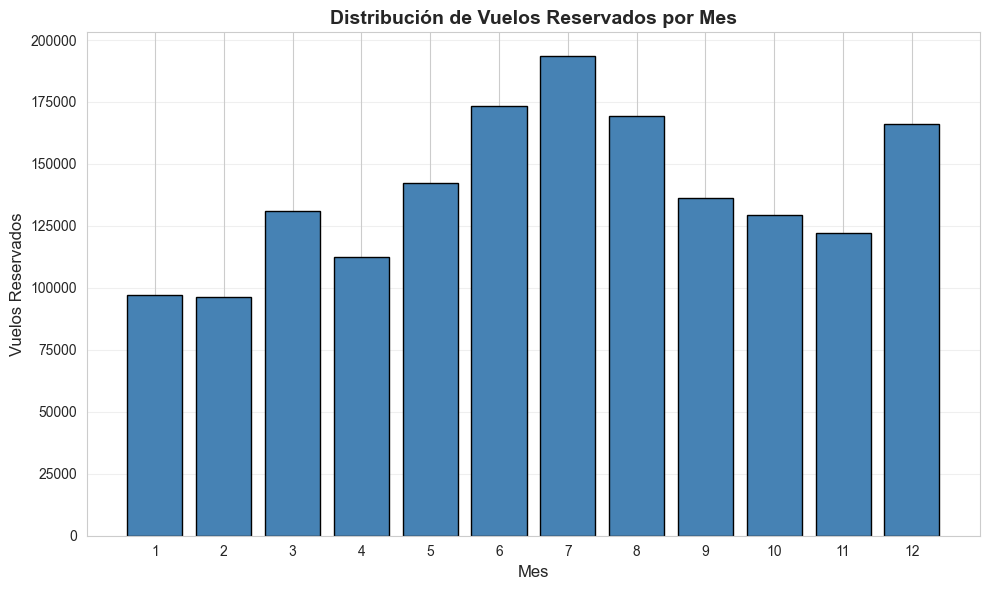

In [ ]:
# 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

# Tipo de gráfica: Gráfico de barras o líneas
# Razón: Muestra la evolución/distribución temporal de una variable numérica

# Agregamos los datos por mes
flights_by_month = df_merged.groupby('month')['flights_booked'].sum().sort_index()

# Crear la visualización
plt.figure(figsize=(10, 6))
plt.bar(flights_by_month.index, flights_by_month.values, color='steelblue', edgecolor='black')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Vuelos Reservados', fontsize=12)
plt.title('Distribución de Vuelos Reservados por Mes', fontsize=14, fontweight='bold')
plt.xticks(range(1, 13))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Interpretación:
# Se observa que los meses de verano (junio-agosto) concentran la mayor actividad,
# En diciembre, también, hay un volumen de reservas considerables.
# mientras que enero y febrero presentan la menor cantidad de reservas.


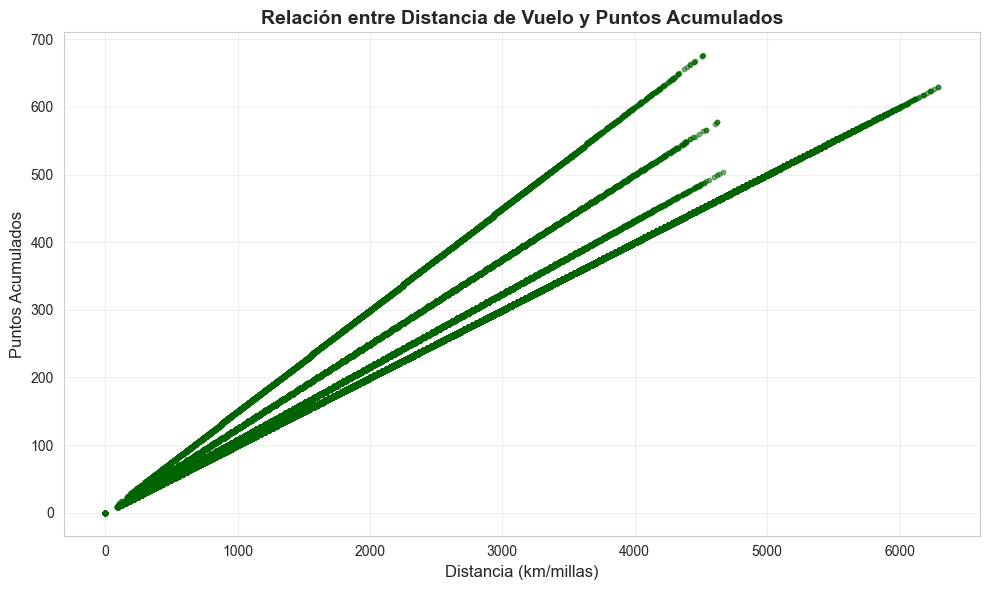

In [ ]:
# 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

# Tipo de gráfica: Gráfico de dispersión (scatter plot)
# Razón: Muestra la relación entre dos variables numéricas

plt.figure(figsize=(10, 6))
plt.scatter(df_merged['distance'], df_merged['points_accumulated'], 
            alpha=0.5, s=10, color='darkgreen')
plt.xlabel('Distancia (km/millas)', fontsize=12)
plt.ylabel('Puntos Acumulados', fontsize=12)
plt.title('Relación entre Distancia de Vuelo y Puntos Acumulados', 
          fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Interpretación:
# Existe una relación lineal positiva clara: a mayor distancia volada, más puntos se acumulan. 

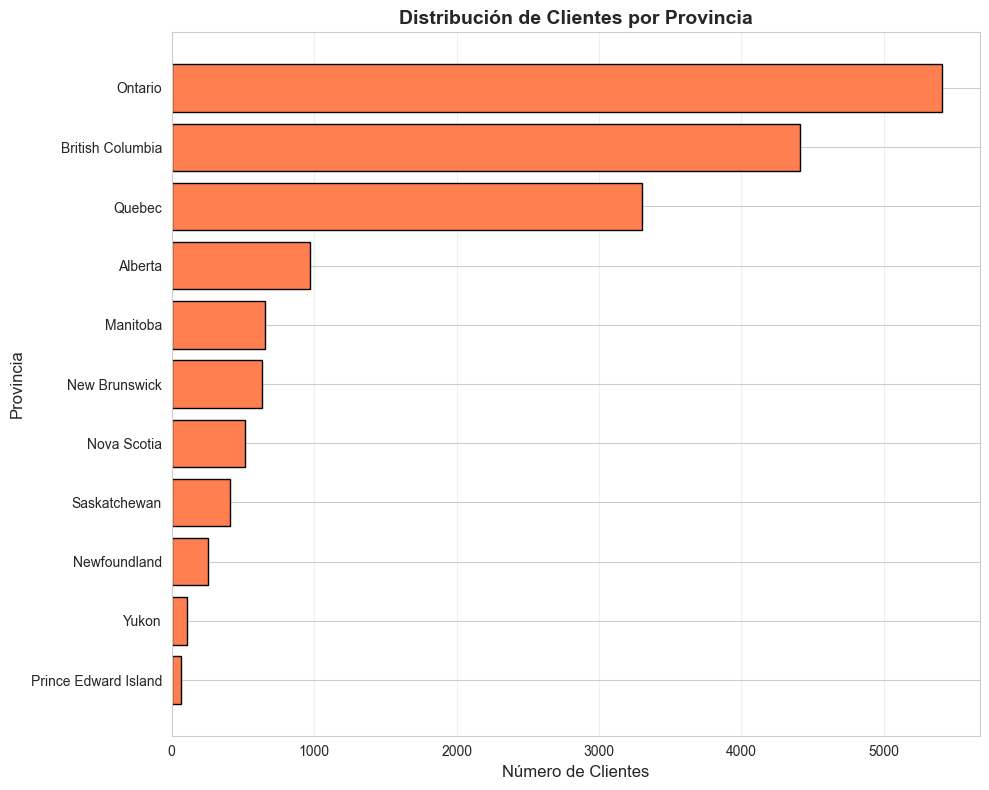

In [ ]:
# 3. ¿Cuál es la distribución de los clientes por provincia o estado?

# Tipo de gráfica: Gráfico de barras horizontal
# Razón: Facilita la comparación entre muchas categorías

# Contamos clientes únicos por provincia
clients_by_province = df_merged.groupby('province')['loyalty_number'].nunique().sort_values(ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(clients_by_province.index, clients_by_province.values, color='coral', edgecolor='black')
plt.xlabel('Número de Clientes', fontsize=12)
plt.ylabel('Provincia', fontsize=12)
plt.title('Distribución de Clientes por Provincia', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Interpretación:
# Ontario y British Columbia concentran la mayor cantidad de clientes.
# Quebec, también, tiene una proporción considerable. 
# Las otras provincias presentan una representación minoritaria.
# Prince Edward Island es la que concentra una menor cantidad.

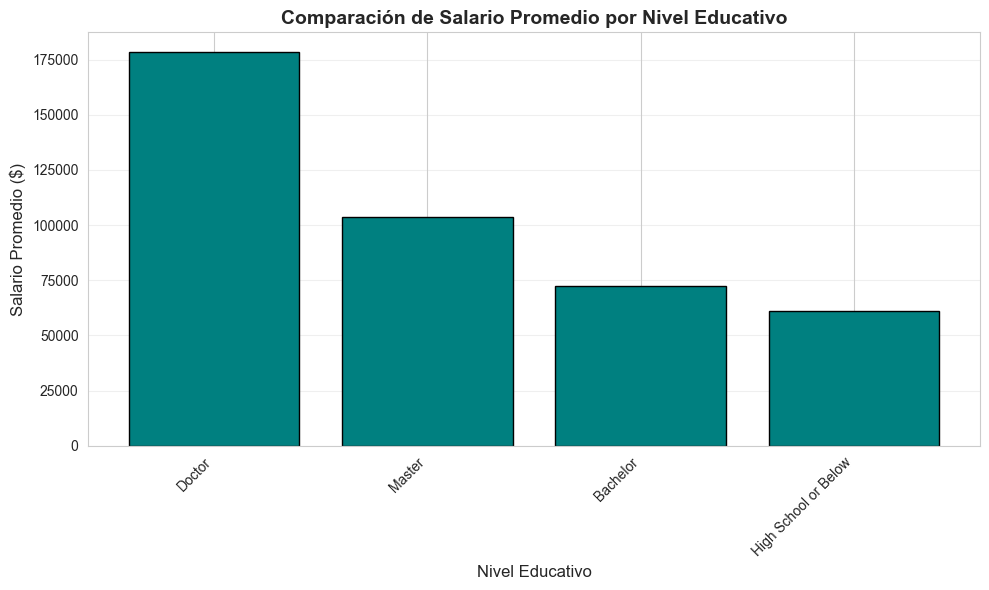

In [ ]:
# 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

# Tipo de gráfica: Gráfico de barras
# Razón: Compara valores promedio entre categorías

# Calculamos el salario promedio por nivel educativo (eliminando nulos)
salary_by_education = df_merged.groupby('education')['salary'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(salary_by_education.index, salary_by_education.values, 
        color='teal', edgecolor='black')
plt.xlabel('Nivel Educativo', fontsize=12)
plt.ylabel('Salario Promedio ($)', fontsize=12)
plt.title('Comparación de Salario Promedio por Nivel Educativo', 
          fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Interpretación:
# Los clientes con nivel educativo superior  (con doctorado o máster)
# presentan salarios promedio significativamente más altos 
# que aquellos con educación básica o con bachillerato.
# Esto sugiere una correlación entre nivel educativo y poder adquisitivo.

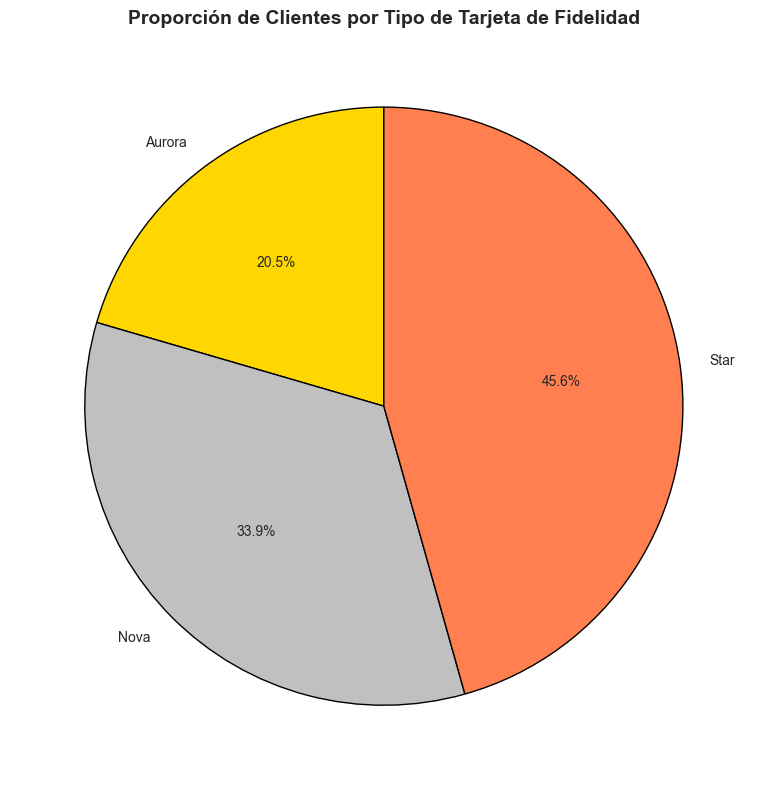

In [ ]:
# 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

# Tipo de gráfica: Gráfico de pastel (pie chart)
# Razón: Muestra proporciones de un total

# Contamos clientes únicos por tipo de tarjeta
card_distribution = df_merged.groupby('loyalty_card')['loyalty_number'].nunique()

plt.figure(figsize=(8, 8))
plt.pie(card_distribution.values, labels=card_distribution.index, 
        autopct='%1.1f%%', startangle=90, colors=['gold', 'silver', 'coral'],
        wedgeprops={'edgecolor': 'black'})
plt.title('Proporción de Clientes por Tipo de Tarjeta de Fidelidad', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Interpretación:
# La tarjeta 'Star' representa el 45,6% de la base de clientes,
# indicando que la mayoría pertenece al nivel estándar del programa.
# Las tarjetas premium (Nova y Aurora) representan una minoría selecta.

<Figure size 1000x600 with 0 Axes>

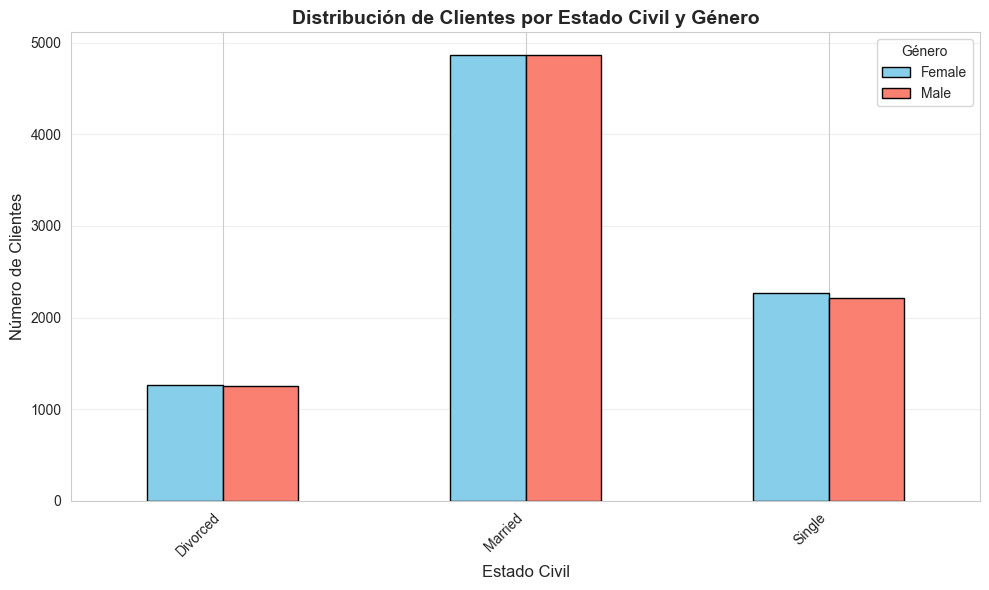

In [24]:
# 6. ¿Cómo se distribuyen los clientes según su estado civil y género? 

# Tipo de gráfica: Gráfico de barras agrupadas
# Razón: Compara dos variables categóricas simultáneamente

# Crear tabla de contingencia
gender_marital = df_merged.groupby(['marital_status', 'gender'])['loyalty_number'].nunique().unstack()

plt.figure(figsize=(10, 6))
gender_marital.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.xlabel('Estado Civil', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.title('Distribución de Clientes por Estado Civil y Género', 
          fontsize=14, fontweight='bold')
plt.legend(title='Género', labels=['Female', 'Male'])
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Interpretación:
# Los clientes casados representan el segmento mayoritario,
# con una distribución equilibrada entre géneros. 
# Los clientes solteros muestran una ligera predominancia femenina, 
# mientras que los divorciados presentan números similares entre ambos géneros.

## Fase 4: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

In [ ]:
''' Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias
significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los
pasos que deberás seguir son:
. Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes:
'Flights Booked' y 'Education'.
. Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas
básicas (como el promedio, la desviación estándar) del número de vuelos reservados para cada
grupo.'''